In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv("E:\\ML PROJECT\\loan_default_prediction\\data\\raw\\Loan_default.csv")

In [4]:
data.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


<Axes: xlabel='Default', ylabel='count'>

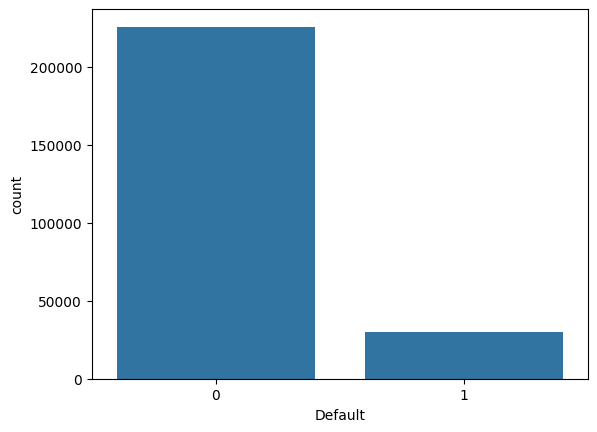

In [5]:
sns.countplot(data=data, x="Default")

# ⚖️ Handling Imbalanced Dataset — Loan Default Prediction

Our dataset is highly imbalanced:

| Default Value | Count |
|---------------|-------|
| 0 (No Default) | 225,694 |
| 1 (Default)    | 29,653  |

---

## 💡 Why Balance the Data?

Imbalanced datasets can cause models to become biased towards the majority class, resulting in poor predictive performance on the minority class.

---

## 🧠 Common Techniques to Balance Data:

| Method                       | Type             | Description                                                           |
|------------------------------|------------------|-----------------------------------------------------------------------|
| **1️⃣ Random Undersampling** | Data Reduction   | Randomly remove samples from the majority class to match minority size. |
| **2️⃣ Random Oversampling**  | Data Boosting    | Duplicate minority class samples to balance the dataset.             |
| **3️⃣ SMOTE**                | Data Generation  | Generates synthetic samples for the minority class using KNN logic.  |
| **4️⃣ ADASYN**               | Data Generation  | Adaptive SMOTE focusing on hard-to-learn samples.                     |
| **5️⃣ Class Weights**        | Model Level      | Assign higher weights to minority samples during model training.     |
| **6️⃣ Ensemble Methods**     | Model Level      | Algorithms like Balanced Random Forest, EasyEnsemble handle imbalance natively. |
| **7️⃣ Threshold Moving**     | Post-Model       | Adjust the probability threshold to improve minority class recall.   |

---

## 💡 Recommended Strategy:

- 🔎 **During EDA:** Use **Random Undersampling** to balance the dataset for fair visual insights.
- 🤖 **During Model Training:** Use **SMOTE** or `class_weight='balanced'` for optimal performance.




# ⚖️ Random Undersampling for Imbalanced Data

Undersampling will reduce the majority class (`Default = 0`) to match the minority class (`Default = 1`) for fair comparison and visualizations.




In [6]:
from sklearn.utils import resample

non_defaulter = data[data["Default"] == 0]
defaulter =data[data["Default"] == 1]

df_undersample = resample(non_defaulter ,
                          replace=False,
                          n_samples=len(defaulter),
                          random_state=42
                          )

df_bal = pd.concat([df_undersample, defaulter])

df_bal = df_bal.sample(frac=1, random_state=42).reset_index(drop=True)

print(df_bal["Default"].value_counts())

Default
0    29653
1    29653
Name: count, dtype: int64


## Univariate Analysis

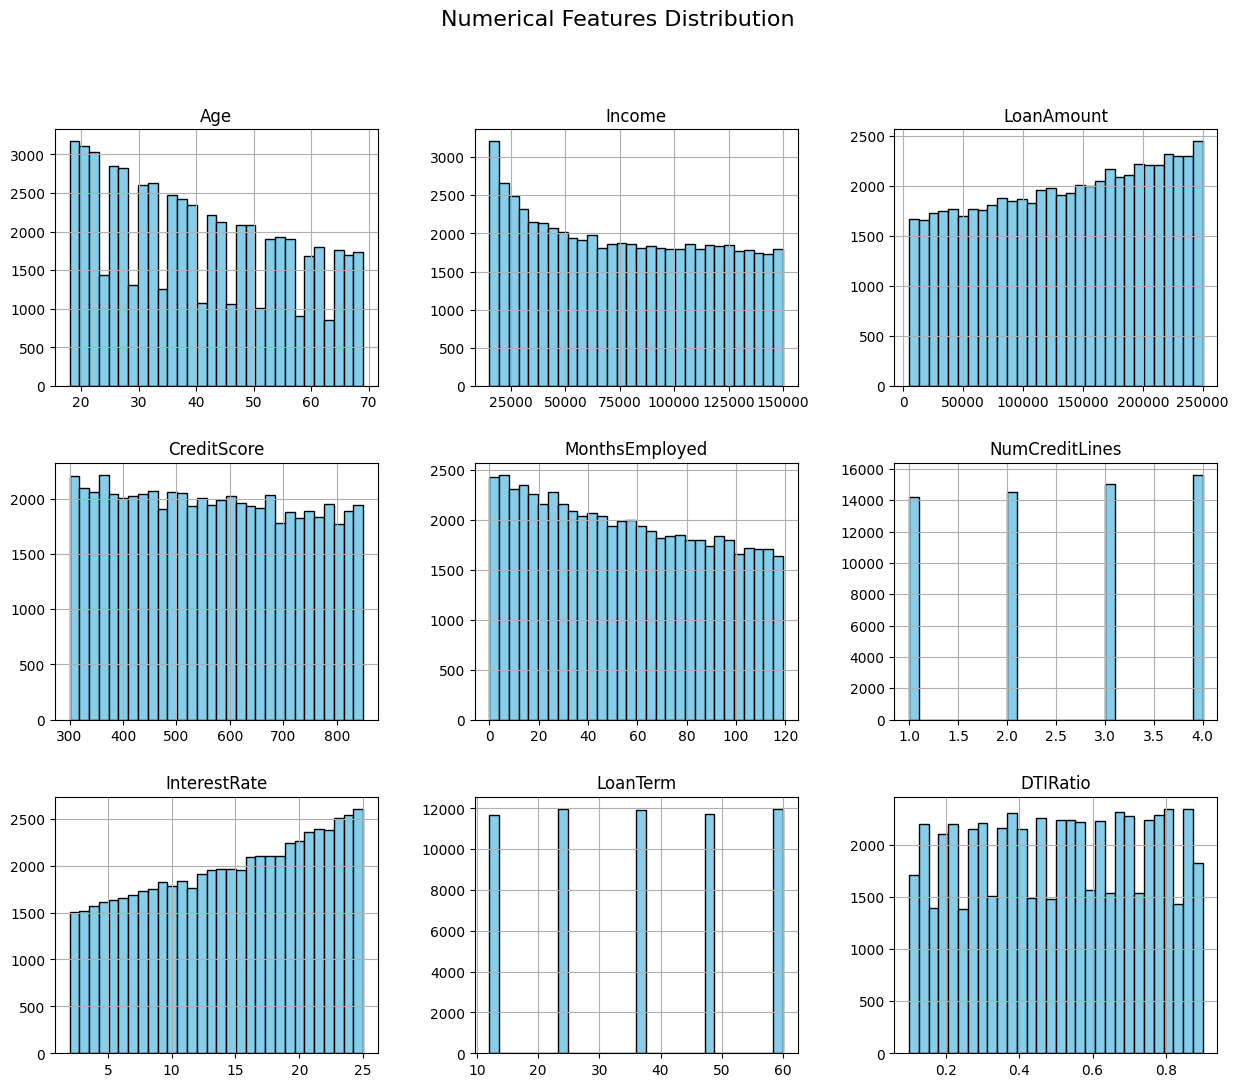

In [7]:
num_cols = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio']
df_bal[num_cols].hist(figsize=(15, 12), bins=30, color='skyblue', edgecolor='black')
plt.suptitle('Numerical Features Distribution', fontsize=16)
plt.show()


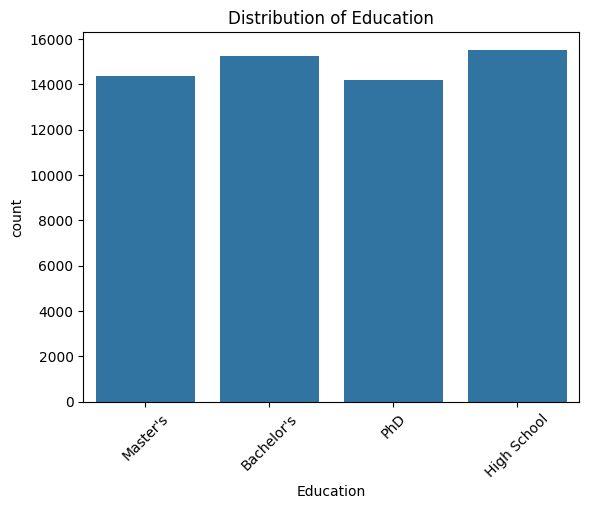

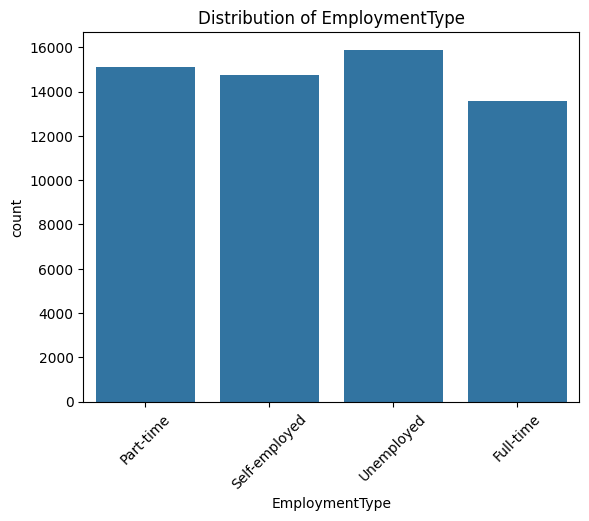

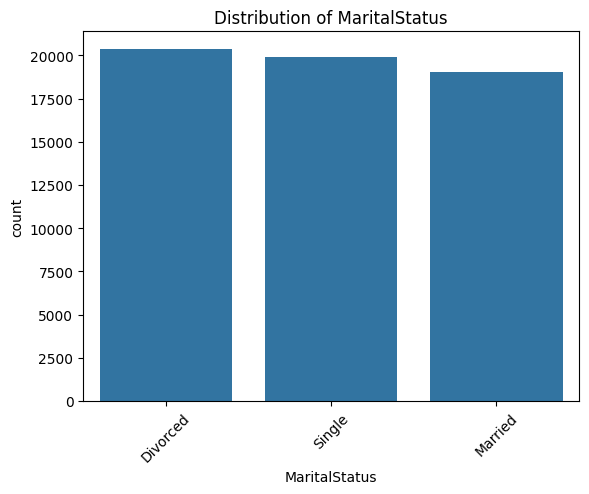

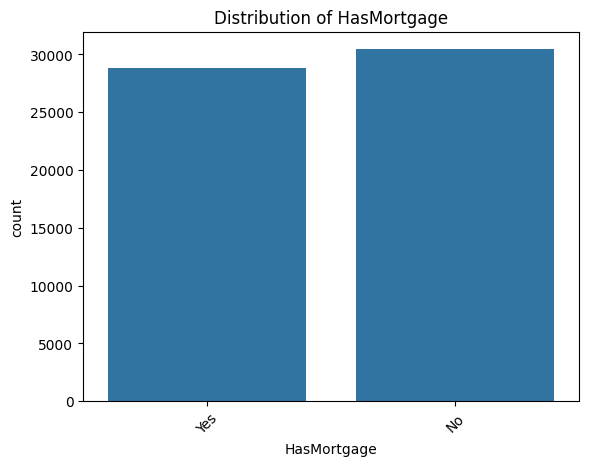

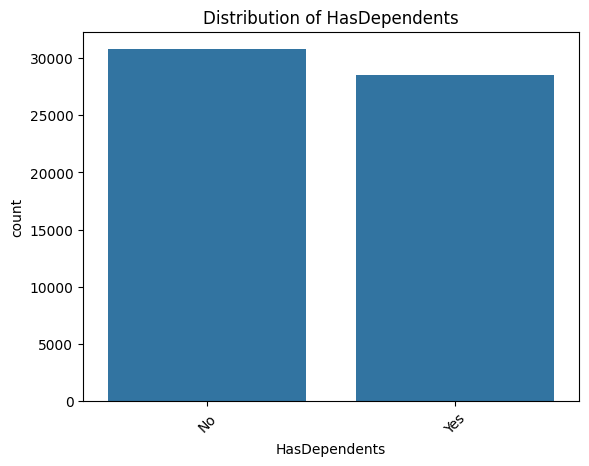

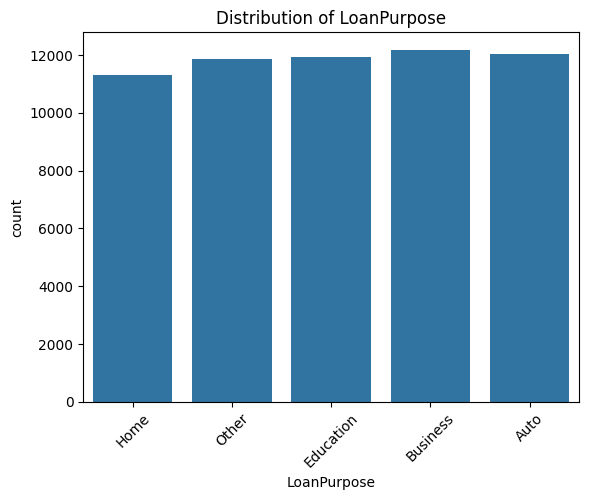

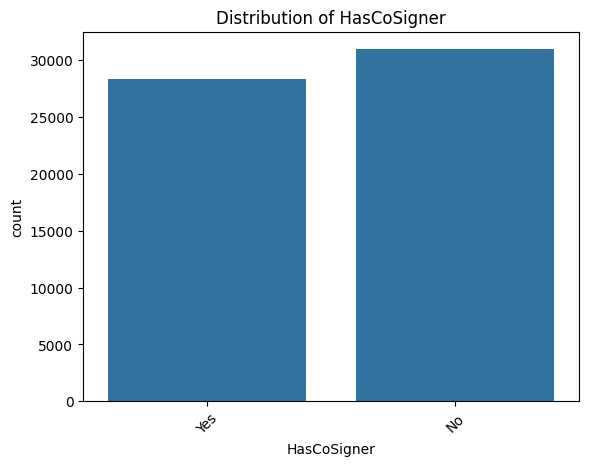

In [8]:
cat_cols = ['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']
for col in cat_cols:
    sns.countplot(x=col, data=df_bal)
    plt.xticks(rotation=45)
    plt.title(f'Distribution of {col}')
    plt.show()


# Bivariate Analysis With Target

In [9]:
cat_cols

['Education',
 'EmploymentType',
 'MaritalStatus',
 'HasMortgage',
 'HasDependents',
 'LoanPurpose',
 'HasCoSigner']

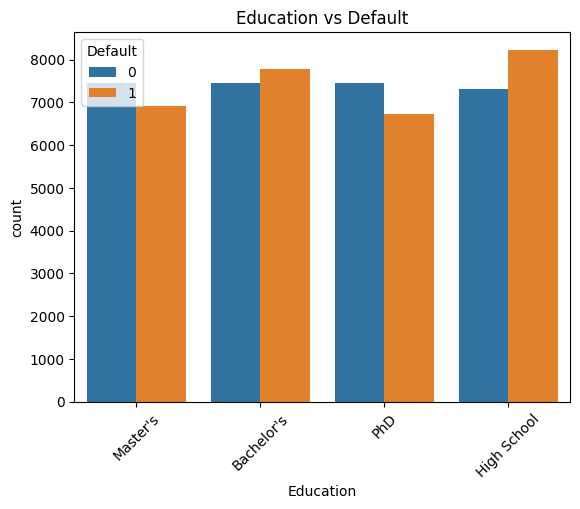

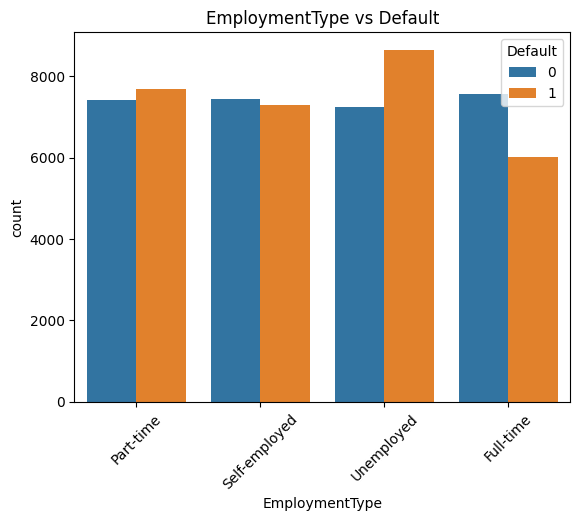

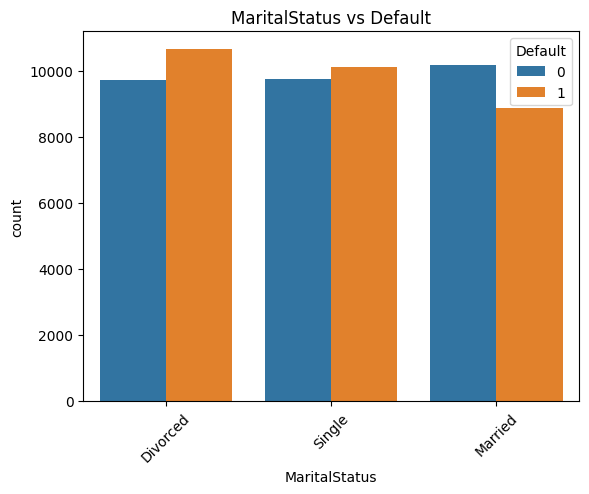

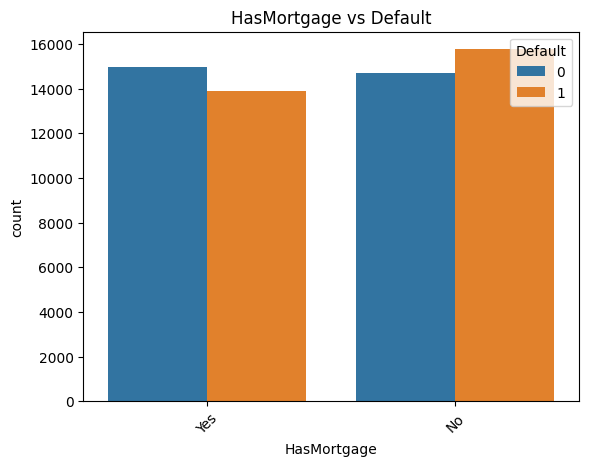

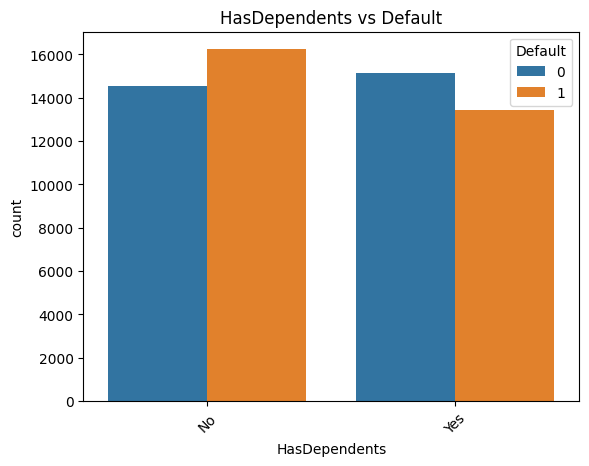

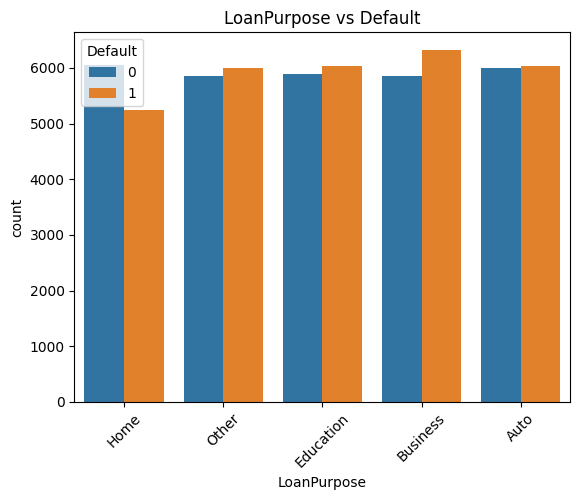

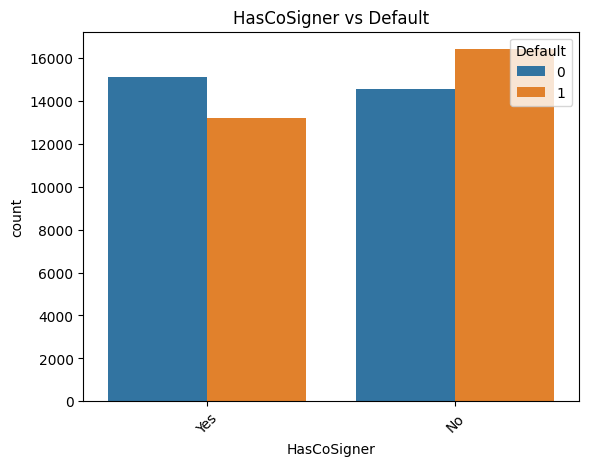

In [10]:
for col in cat_cols:
    sns.countplot(x=col,
                  hue='Default',
                  data = df_bal)
    plt.xticks(rotation=45)
    plt.title(f"{col} vs Default")
    plt.show()

# 📊 Insights from EDA — Loan Default Prediction

After analyzing the balanced dataset, here are some key observations:

---

### 🎓 **Education Level**
- **Bachelors** and **High School** graduates are more likely to default on loans.
- **Masters** and **PhD** holders show significantly lower default rates, suggesting higher financial stability or income levels.

---

### 💼 **Employment Type**
- **Part-Time** and **Unemployed** individuals represent a larger proportion of defaulters.
- **Self-Employed** and **Full-Time** workers show lower default rates, likely due to steady income streams.

---

### 💍 **Marital Status**
- **Divorced** and **Single** applicants have a higher tendency to default.
- **Married** individuals are less likely to default, possibly indicating shared financial responsibility and stability.

---

### 🏠 **Has Mortgage**
- Applicants **without a mortgage** are more prone to default.
- **Having a mortgage** appears to be a positive indicator of creditworthiness.

---

### 👨‍👩‍👧‍👦 **Has Dependents**
- Individuals **without dependents** show higher default rates.
- Applicants with **dependents** often show lower default rates, possibly due to careful financial planning.

---

### 💡 **Loan Purpose**
- Loans for **Business** purposes are more likely to default.
- Loans for **Home** and **Auto** purposes show lower default rates — these are generally safer lending categories.

---

### 🤝 **Has Co-Signer**
- Loans that have a **Co-Signer** are less likely to default.
- This indicates that co-signers add security and accountability to the loan.

---

✅ These insights can help financial institutions fine-tune their **risk scoring models** and identify high-risk applicants before loan approval.



### Numerical Features Vs Default

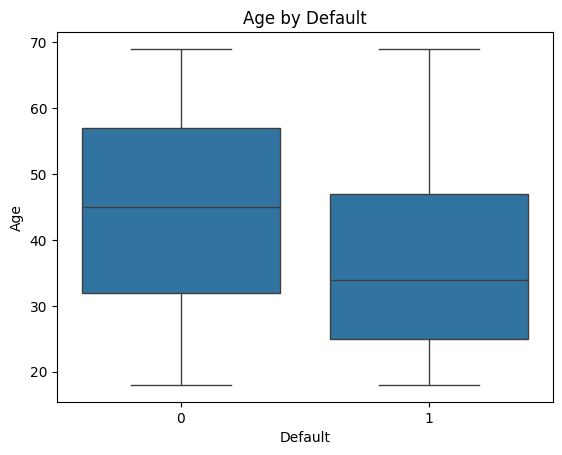

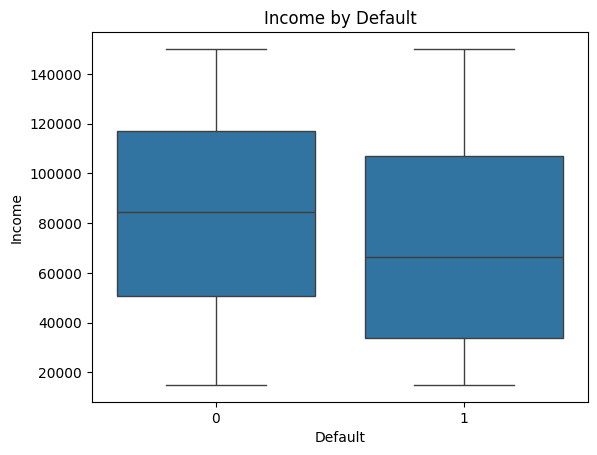

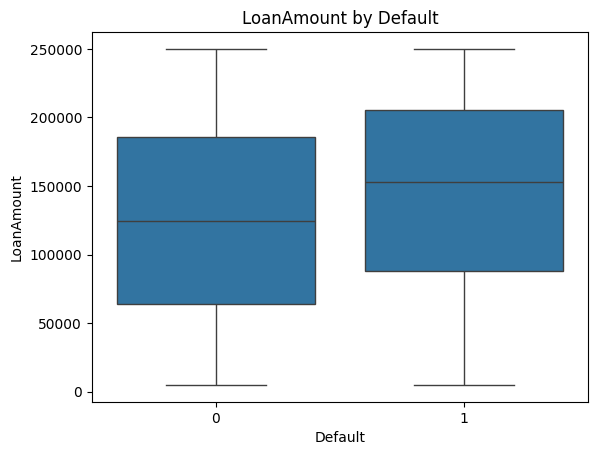

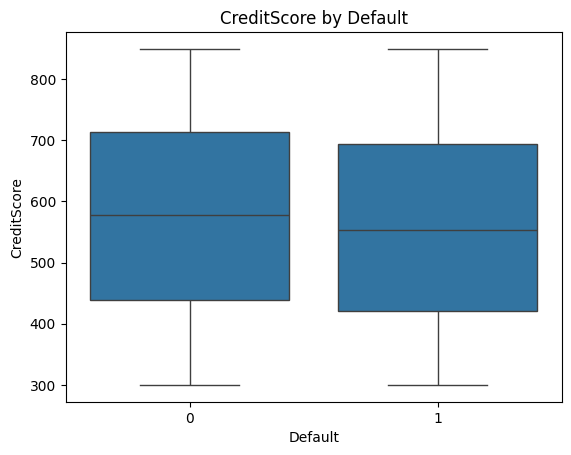

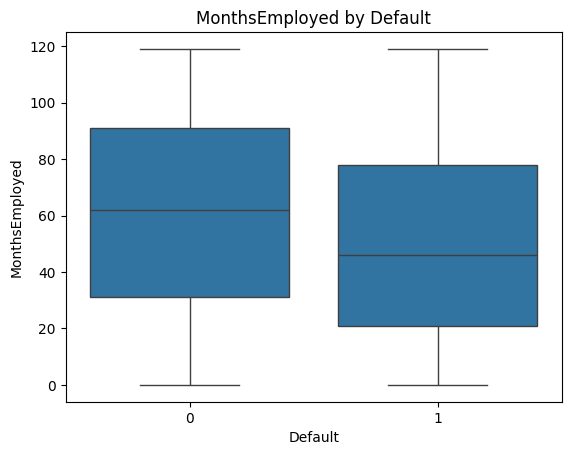

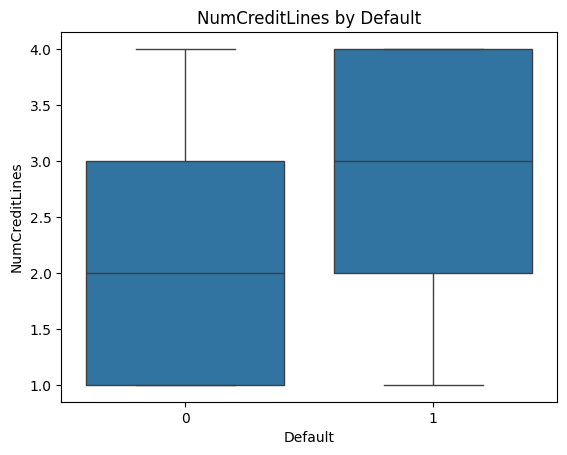

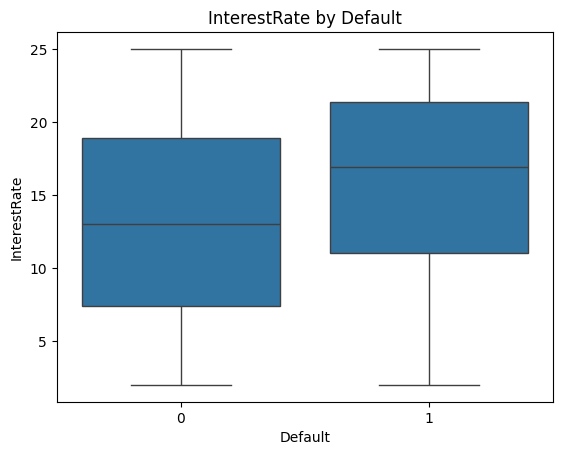

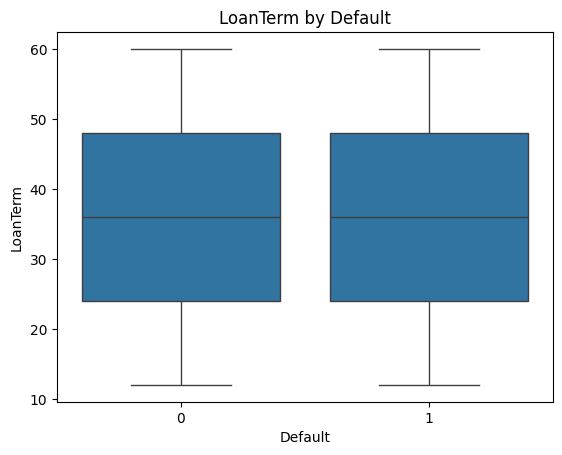

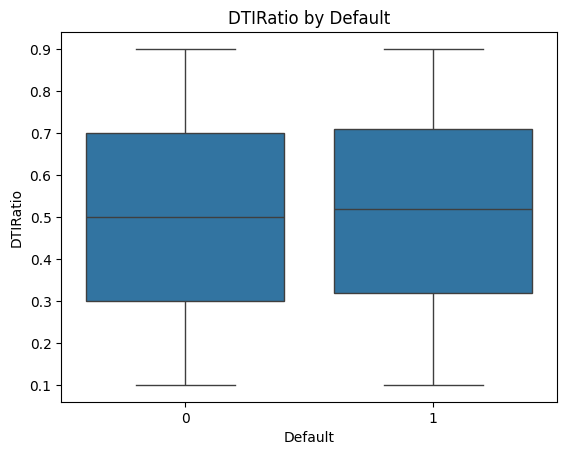

In [11]:
for col in num_cols:
    sns.boxplot(x='Default', y=col, data=df_bal)
    plt.title(f'{col} by Default')
    plt.show()


# 🔍 Numerical Feature Insights — Loan Default Prediction

---

### 📅 **Age**
- Individuals in the age group of **25 to 45 years** are observed to have a higher default rate.
- This could indicate higher financial commitments, lifestyle expenses, or career instability during this age span.

---

### 💸 **Income**
- **Lower income groups** are more prone to default.
- Indicates affordability and repayment capability are closely linked to income.

---

### 💰 **Loan Amount**
- Borrowers who have taken loans between **1 Lakh to 2.2 Lakhs** are the majority among defaulters.
- Suggests that higher loan sizes might pose a greater risk for defaults.

---

### 💳 **Credit Score**
- Surprisingly, **Credit Score** does not show a strong correlation with loan default in this dataset.
- Possibly due to inconsistencies in how creditworthiness was assessed during lending.

---

### 🏢 **Months Employed**
- **Fewer months employed** appears to correlate with a higher chance of default.
- Indicates job stability might play a key role in repayment success.

---

### 🧾 **Number of Credit Lines**
- Borrowers with **higher numbers of credit lines** are more likely to default.
- Indicates over-leveraging or excessive credit usage can signal potential risk.

---

### ⏳ **Loan Term & DTI Ratio**
- Both **Loan Term** and **DTI (Debt-to-Income) Ratio** do not show a strong pattern distinguishing defaulters.
- These features might have weaker predictive power in this specific dataset.

---

✅ **Conclusion:**  
This numerical feature analysis confirms that variables like **Age, Income, Loan Amount, Months Employed, and Number of Credit Lines** are more meaningful for predicting loan defaults, whereas **Credit Score, Loan Term, and DTI Ratio** seem less impactful here.



## Correlation Heatmap

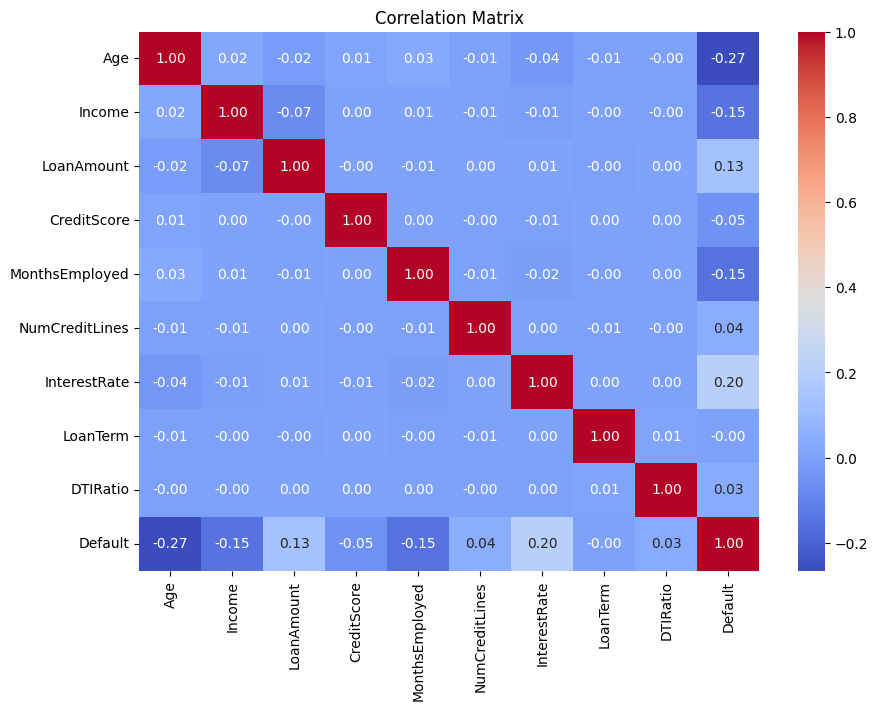

In [12]:
plt.figure(figsize=(10,7))
sns.heatmap(df_bal[num_cols + ['Default']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


# 📊 Correlation Matrix — Observations

---

### 🧠 **Key Insights from the Correlation Heatmap**

1. **Age vs Default**
   - Correlation: `-0.27`  
   - Interpretation: As age increases, the likelihood of defaulting **decreases** slightly. Younger individuals are more prone to default.

---

2. **Income vs Default**
   - Correlation: `-0.15`  
   - Interpretation: Lower income is slightly associated with a higher chance of default, supporting the idea that income is a financial risk indicator.

---

3. **Loan Amount vs Default**
   - Correlation: `0.13`  
   - Interpretation: Larger loan amounts tend to show a **positive correlation** with defaulting — higher the loan, higher the risk.

---

4. **Interest Rate vs Default**
   - Correlation: `0.20`  
   - Interpretation: Higher interest rates are linked to more defaults. This suggests that riskier borrowers are charged higher rates, which may lead to repayment difficulties.

---

5. **Months Employed vs Default**
   - Correlation: `-0.15`  
   - Interpretation: Less employed individuals (short employment duration) are more likely to default.

---

6. **Credit Score vs Default**
   - Correlation: `-0.05`  
   - Interpretation: Weak negative relationship. Credit score alone doesn't strongly define defaulting in this dataset.

---

7. **Loan Term & DTI Ratio vs Default**
   - Correlation: `~0`  
   - Interpretation: These features do not show meaningful correlation with loan default. Could be less useful as predictors without more transformation.

---

### ✅ **Conclusion**
- Age, Income, Loan Amount, Months Employed, and Interest Rate are your strongest signals.
- Credit Score, Loan Term, and DTI Ratio appear less informative for this dataset.
- Feature selection or engineering can now focus on enhancing the important ones and reducing noise from low-impact features.

---



### Defualt Rate by loan Purpose 

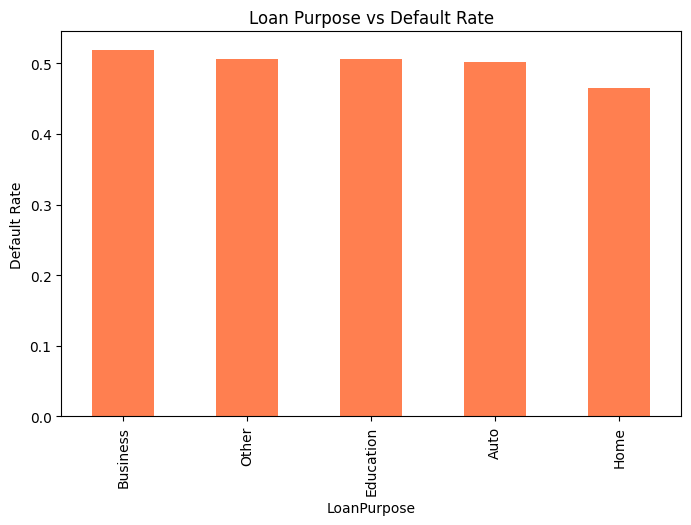

In [13]:
purpose_default = df_bal.groupby('LoanPurpose')['Default'].mean().sort_values(ascending=False)
purpose_default.plot(kind='bar', figsize=(8,5), color='coral')
plt.ylabel('Default Rate')
plt.title('Loan Purpose vs Default Rate')
plt.show()




# 📝 Final EDA Checklist ✅

| EDA Task                                    | Status  |
|---------------------------------------------|---------|
| ✔️ Missing Value Analysis                   | Completed / Handled |
| ✔️ Outlier Detection (Boxplots / IQR)        | Recommended for numeric features |
| ✔️ Data Distribution (Histograms / KDE)      | Completed for Age, Income, LoanAmount |
| ✔️ Categorical Distribution (Countplots)     | Completed for Education, EmploymentType, MaritalStatus, etc. |
| ✔️ Target Imbalance Check                   | Done — Class 0 and Class 1 imbalance identified |
| ✔️ Feature Correlation Heatmap              | Done — Observations noted |
| ✔️ Feature-to-Target Relationship           | Completed — Detailed analysis written |
| ✔️ Summary Statistics (`df.describe()`)     | Recommended for numeric sanity check |

---



### 💡 Extra (Optional but Valuable)

| Suggested Analysis                     | Purpose                         |
|----------------------------------------|---------------------------------|
| 🔥 PCA or t-SNE                        | For dimensionality reduction & visualization |
| 💪 RandomForest Feature Importance      | Understand pre-model variable significance |
| 📊 Pairplots or Scatter Matrix         | Visualize feature interactions |

---

# PCA

- ✅ Reducing dimensions for visualization
- ✅ Spotting natural clusters or separations in data
- ✅ Detecting overlap between defaulters and non-defaulters.

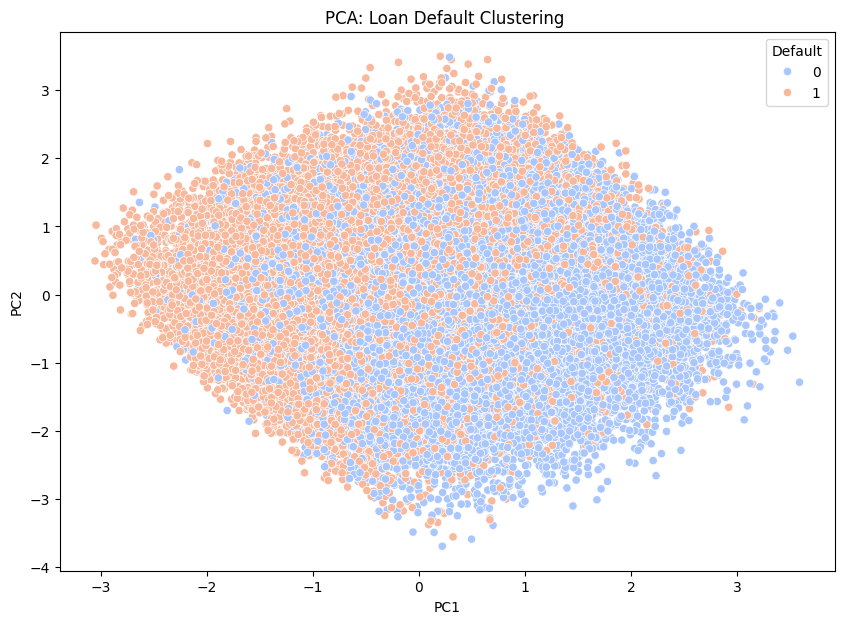

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#selecting only Numerical columns (excluding target)

x = df_bal[num_cols]
y = df_bal["Default"]

#standardize the features 

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# apply PCA
pca = PCA(n_components=2) # 2d Visualization
x_pca = pca.fit_transform(x_scaled)

# create dataframe for plotting 
pca_df = pd.DataFrame(data = x_pca, columns=['PC1', 'PC2'])
pca_df['Default'] = y.values


#plotting 

plt.figure(figsize=(10,7))
sns.scatterplot(data= pca_df,
                x= 'PC1',
                y='PC2',
                hue="Default",
                palette='coolwarm'
                )
plt.title("PCA: Loan Default Clustering ")
plt.show()

## 🧠 PCA Analysis: Loan Default Clustering

### 📌 Purpose:
Principal Component Analysis (PCA) was applied to reduce the high-dimensional feature space into 2 components for visualization and to check the natural clustering of **Defaulters (1)** and **Non-Defaulters (0)**.

---

### 💡 Observations:

- The plot shows **PC1** and **PC2** — the two principal components that capture the most variance in the dataset.
- **Blue Dots (0)** represent Non-Defaulters.
- **Orange Dots (1)** represent Defaulters.

---

### 📊 Insights:

- The data points for defaulters and non-defaulters **heavily overlap** — meaning the current numeric features do not provide a clear linear separation.
- **Some sparse regions** on the edges of the plot seem to have more non-defaulters, suggesting that extreme PC values lean toward safer borrowers.
- The **majority of points lie densely in the center** for both classes, indicating that more advanced feature interactions or non-linear relationships likely govern the prediction.

---

### ⚡️ Conclusion:

- Current features may not fully separate defaulters from non-defaulters.
- **Non-linear models** (Random Forest, XGBoost, SVM) will likely perform better than linear models.
- Further **feature engineering** could enhance separation.
- Applying **t-SNE** is recommended to check for non-linear separability.

---


### Export the Balance dataset 

In [17]:
import os
output_path = "E:\\ML PROJECT\\loan_default_prediction\\data\\raw"
os.makedirs(output_path, exist_ok=True)
df_bal.to_csv(os.path.join(output_path, "Loan_default_balanced.csv"), index=False)

print("Balanced Data Exported Successfully")


Balanced Data Exported Successfully


# t-SNE

- t-sne will take time to execute around 18 min

e:\ML PROJECT\loan_default_prediction\venv\lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


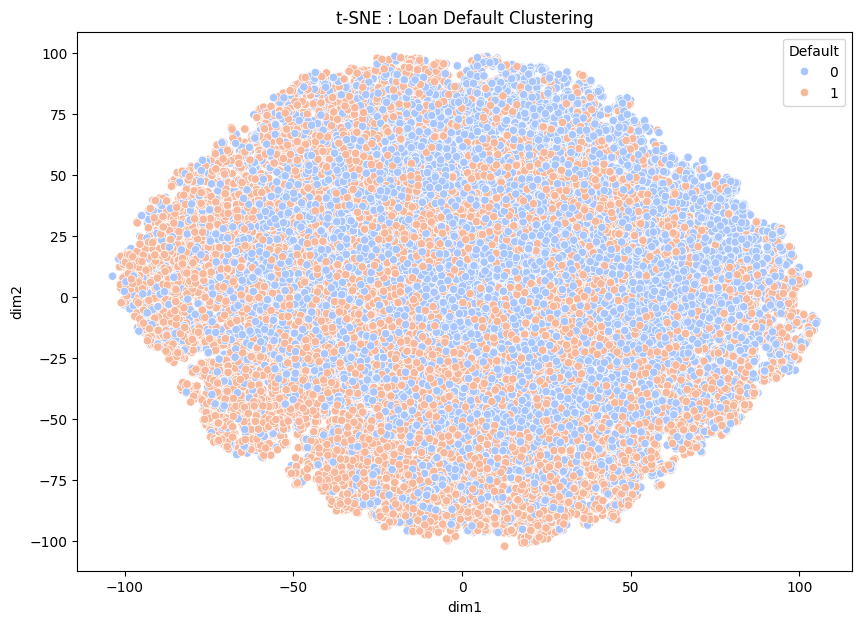

In [15]:
from sklearn.manifold import TSNE

#apply TSNE
tsne = TSNE(n_components=2 , perplexity=30 , n_iter=1000, random_state=42)
x_tsne = tsne.fit_transform(x_scaled)

#create DataFrame for plotting 
tsne_df = pd.DataFrame(data=x_tsne, 
                       columns=['dim1', 'dim2'])
tsne_df['Default'] = y.values

#plot 
plt.figure(figsize=(10,7))
sns.scatterplot(data=tsne_df, 
                x='dim1',
                y='dim2',
                hue='Default',
                palette='coolwarm'

                )
plt.title('t-SNE : Loan Default Clustering')
plt.show()
